#### Data Cleanup 2



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
#from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()

In [4]:
file = (os.path.abspath(''))  
print(file)
combined = pd.read_csv('/Users/Birr/projects/cap2/data/interim/combined.csv', low_memory=False)

/Users/Birr/projects/cap2/notebooks


In [5]:
combined.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_GYRO,INSTR_HELI,INSTR_IAIR,INSTR_IHEL,INSTR_PLFT,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20001208X0880311,20001208X08803,20001208X088031,20001208X0880312,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,20001208X0880311,20001208X08803,20001208X088031,20001208X0880313,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,20001208X0880311,20001208X08803,20001208X088031,20001208X0880314,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,C,ACC,USA,N,N,DAYL,F

In [6]:
combined['crew_age'].fillna(0, inplace=True)
combined['crew_age'] = combined['crew_age'].astype(int)

In [7]:
#subset pilots with age = 0  (no age reported)
zero_age = combined[combined['crew_age'] == 0]
zero_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 64 to 47608
Columns: 146 entries, Unnamed: 0 to SIMU-TOTL
dtypes: float64(111), int64(7), object(28)
memory usage: 4.0+ MB


In [8]:
# fill in pilot age with average pilot age based on total flight hours

#define levels of pilot experience categories in bin of 250 hours
pilot0_max_hour = zero_age['ALL-TOTL'].max()
age_med_by_time = {} #holds median age for each time bracket
for hour_bin in range(1, int(pilot0_max_hour), 250):
    time_range = (hour_bin, hour_bin + 250)
    pop_age = combined[(combined['ALL-TOTL'] >= int(hour_bin)) & (combined['ALL-TOTL'] < (int(hour_bin) + 250))]
    age_med_by_time[time_range] = int(pop_age['crew_age'].median())
    
totl_idx = zero_age.columns.get_loc('ALL-TOTL')
age_idx = zero_age.columns.get_loc('crew_age')

for i in range(0, len(zero_age.index)):
    for key in age_med_by_time:
        if (zero_age.iloc[i,totl_idx] >= key[0]) & (zero_age.iloc[i,totl_idx] < key[1]):
            zero_age.iloc[i,age_idx] = age_med_by_time[key]
            

/Users/Birr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
#aged_pilots contains pilots with imputed ages based on experience
aged_pilots = zero_age[zero_age['crew_age'] != 0]
aged_pilots.reset_index(inplace=True)
print(aged_pilots.info())
aged_pilots.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Columns: 147 entries, index to SIMU-TOTL
dtypes: float64(111), int64(8), object(28)
memory usage: 112.7+ KB
None


,index,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_GYRO,INSTR_HELI,INSTR_IAIR,INSTR_IHEL,INSTR_PLFT,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,1174,1174,20080729X0112411,20080729X01124,20080729X011241,20080729X0112411,7/28/2008 0:00:00,91,UNK,PILOT,60,M,CL2,VALID,5/15/2008 0:00:00,3,Environmental issues,2,Physical environment,20,Object/animal/substance,10,Pole,91,Contributed to outcome,,INC,USA,N,N,DAYL,NONE,VMC,NONE,BUS,Approach - VFR pattern - turn to base,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1175,1175,20080729X0112411,20080729X01124,20080729X011241,20080729X0112412,7/28/2008 0:00:00,91,UNK,PILOT,60,M,CL2,VALID,5/15/2008 0:00:00,2,Personnel issues,6,Task performance,10,Planning/preparation,10,Performance calculations,36,Flight crew,C,INC,USA,N,N,DAYL,NONE,VMC,NONE,BUS,Approach - VFR pattern - turn to base,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1176,1176,20080729X0112411,20080729X01124,20080729X011241,20080729X0112413,7/28/2008 0:00:00,91,UNK,PILOT,60,M,CL2,VALID,5/15/2008 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,10,Temp/humidity/pressure,20,High density altitude,81,Effect on equipment,,INC,USA,N,N,DAYL,NONE,VMC,NONE,BUS,Approach - VFR pattern - turn to base,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1177,1177,20080729X0112411,20080729X01124,20080729X011241,20080729X0112414,7/28/2008 0:00:00,91,UNK,PILOT,60,M,CL2,VALID,5/15/2008 0:00:00,1,Aircraft,

In [10]:
#backfill ages to combined df.

age_idx = combined.columns.get_loc('crew_age')
pilot_idx = combined.columns.get_loc('pilot_key')

for i in range (0, len(aged_pilots.index)):
    for r in range (0, len(combined.index)):
        if aged_pilots.iloc[i,2] == combined.iloc[r,pilot_idx]:
            combined.iloc[r,age_idx] = aged_pilots.iloc[i,10]
           

In [11]:
#Check how many pilots left with no age derived
zero_age = combined[combined['crew_age'] == 0]
zero_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3495 entries, 64 to 47608
Columns: 146 entries, Unnamed: 0 to SIMU-TOTL
dtypes: float64(111), int64(7), object(28)
memory usage: 3.9+ MB


In [12]:
#mean age of pilot in overall dataset
age_avg_df = combined[combined['crew_age']!=0]
avg_age = int(age_avg_df['crew_age'].mean())
print(avg_age)

53


In [13]:
#backfill remaining 0 ages with df average.
for i in range (0, len(combined.index)):
    if combined.iloc[i,age_idx] == 0:
        combined.iloc[i,age_idx] = avg_age

In [14]:
#Check how many pilots left with no age imputed
zero_age = combined[combined['crew_age'] == 0]
zero_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 146 entries, Unnamed: 0 to SIMU-TOTL
dtypes: float64(111), int64(7), object(28)
memory usage: 0.0+ bytes


In [15]:
#table is now adjusted with derived ages
combined['crew_age'].describe()

count    47643.000000
mean        53.432571
std         14.768896
min         14.000000
25%         44.000000
50%         54.000000
75%         64.000000
max        100.000000
Name: crew_age, dtype: float64

In [16]:
#cleanup milestone - save to csv 


combined.to_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', index=False)

####   ***************************     Cleanup - Milestone  Save-Reload Data  *****************************

In [17]:
#Reload data
df = pd.read_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', low_memory=False)

In [18]:
df['crew_age'].isna().sum(axis=0)

0

In [19]:
#generate_profile(eda)

In [20]:
df.rename(columns={'INSTR_AME':'INSTRUCT_AME', 'INSTR_ASE':'INSTRUCT_ASE', 'INSTR_GLI':'INSTRUCT_GLI', 
                    'INSTR_IAIR':'INSTRUCT_IAIR', 'INSTR_SPRT':'INSTRUCT_SPRT', 'INSTR_NONE':'INSTRUCT_NONE',
                    'ALL-INST': 'ALL-INSTRUM', 'GLDR-INST':'GLDR-INSTRUCT', 'MAKE-INST':'MAKE-INSTRUCT',
                    'MENG-INST':'MENG-INSTRUCT', 'NGHT-INST':'NGHT-INSTRUCT', 'SENG-INST':'SENG-INSTRUCT'}, inplace=True)

In [21]:
#after further consideration drop additional columns as they won't be needed in analysis
to_drop = ['ac_key', 'ev_id', 'find_key','second_pilot', 'ev_country', 'flt_plan_filed', 'phase_flt_spec', 'CERT_RMPT', 
           'OTHR_SUAS', 'SIMU-INST', 'SIMU-IRCV', 'SIMU-L24H', 'SIMU-L30D', 'SIMU-L90D', 'SIMU-PIC',
           'ROTO-INST', 'ROTO-IRCV', 'ROTO-L24H', 'ROTO-L30D', 'ROTO-L90D', 'ROTO-PIC', 'ROTO-TOTL',
           'OTHR_AIRS', 'OTHR_BALL', 'OTHR_GLI', 'OTHR_GYRO', 'OTHR_HELI', 'OTHR_PLFT', 'OTHR_SUAS', 'OTHR_NONE',
           'LTA-INST', 'LTA-IRCV', 'LTA-L24H', 'LTA-L30D', 'LTA-L90D', 'LTA-PIC', 'LTA-TOTL', 'Unnamed: 0', 
           'INSTR_PLFT', 'CERT_FE', 'INSTR_GYRO', 'INSTR_HELI', 'INSTR_IHEL','INSTRUM_HELI', 'INSTR_PLFT',
           'INC-NO','REL-NO', 'INSTRUM_PLFT']
df.drop(columns=to_drop, inplace=True)
df.head()

,pilot_key,ev_date,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,20001208X0880311,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,20001208X0880311,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,20001208X0880311,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,20001208X0880311,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,20001208X0880311,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,0,(general),20,Not attained/maintained,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


In [22]:
df['ev_date'] = pd.to_datetime(df['ev_date'])

In [23]:
#analyze far_part data (type of operation)
df.far_part.value_counts()

91      35454
UNK        24
103         6
091K        4
Name: far_part, dtype: int64

In [24]:
#unable to impute UNK values -- drop records
df.drop(df[df['far_part'] == 'UNK'].index, inplace = True)
df.far_part.value_counts()

91      35454
103         6
091K        4
Name: far_part, dtype: int64

In [25]:
df['far_part'].isna().sum(axis=0)

12155

In [26]:
df['far_part'] = df['far_part'].fillna('delete')

In [27]:
df.drop(df[df['far_part'] == 'delete'].index, inplace = True)

In [28]:
df['far_part'].isna().sum(axis=0)

0

In [29]:
#Analyze crew category
df['crew_category'].isna().sum(axis=0)

293

In [30]:
df['crew_category'] = df['crew_category'].fillna('UNK')
df.crew_category.value_counts()

PILOT      33207
STUDENT     1942
UNK          315
Name: crew_category, dtype: int64

In [31]:
unkstu = df[df['crew_category']=='UNK']
unkstu.head(10)

,pilot_key,ev_date,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
399,NaN,2008-04-18,91,UNK,53,NaN,NaN,NaN,NaN,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,10,Airspeed,20,Not attained/maintained,C,ACC,N,N,DAYL,FATL,VMC,INST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,2008-04-18,91,UNK,53,NaN,NaN,NaN,NaN,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,40,Instructor/check pilot,C,ACC,N,N,DAYL,FATL,VMC,INST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,2008-04-23,91,UNK,53,NaN,NaN,NaN,NaN,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,52,Prop/rotor parameters,11,Incorrect use/operation,C,ACC,N,N,DAYL,NONE,VMC,INST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,NaN,2008-04-23,91,UNK,53,NaN,NaN,NaN,NaN,3,Environmental issues,3,Conditions/weather/phenomena,40,Wind,45,Gusts,99,Not specified,F,ACC,N,N,DAYL,NONE,VMC,INST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,2008-08-23,91,UNK,53,NaN,NaN,NaN,NaN,2,Personnel issues,4,Action/decision,10,Action,15,Incorrect action performance,46,Student pilot,C,ACC,N,N,DAYL,NONE,VMC,INST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,2008-08-23,91,UNK,53,NaN,NaN,NaN,NaN,2,Personnel issues,6,Task performance,35,Communication (personnel),37,Following instructions,33,Copilot,C,ACC,N,N,DAYL,NONE,VMC,INST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2175,NaN,2008-09-04,91,UNK,53,NaN,NaN,NaN,NaN,2,Personnel issues,6,Task performance,35,

In [32]:
# impute student if cert_stu = true
stud_cert = df.loc[(df['crew_category'] == 'UNK') & (df['CERT_STU'] == 1.0)]
stud_cert.head(0)

# none found

,pilot_key,ev_date,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL


In [33]:
#using domain knowledge will impute any UNK with less than 60 hour of flt time as Student, otherwise Pilot
unk_low_time = df.loc[(df['ALL-TOTL'] <= 60) & (df['crew_category'] == 'UNK')]
unk_low_time.shape

(0, 100)

There are no Crew_category UNK records with less that 60 flight hours. Inpute all UNK records as pilots.

In [34]:
df['crew_category'] = df['crew_category'].replace(['UNK'], 'PILOT')
df.crew_category.value_counts()

PILOT      33522
STUDENT     1942
Name: crew_category, dtype: int64

In [35]:
df['crew_sex'].isna().sum(axis=0)

7640

In [36]:
#analyse crew_sex
df['crew_sex'] = df['crew_sex'].fillna('UNK')
df.crew_sex.value_counts()

M      26894
UNK     7640
F        930
Name: crew_sex, dtype: int64

In [37]:
df['med_certf'].isna().sum(axis=0)

375

In [38]:
df['med_certf'] = df['med_certf'].fillna('UNK')
df['med_certf'] = df['med_certf'].str.strip()
df.med_certf.value_counts()

CL3     19377
CL2      7931
CL1      3539
NONE     1918
SPRT     1752
UNK       542
BASC      405
Name: med_certf, dtype: int64

In [39]:
#sport pilots do now required a med cert, Basic is not an official medical certificate. Entries may have been done to reflect
#other information. Will condense SPRT/BASC to NONE.

df['med_certf'] = df['med_certf'].replace(['SPRT', 'BASC'],'NONE')
df.med_certf.value_counts()

CL3     19377
CL2      7931
NONE     4075
CL1      3539
UNK       542
Name: med_certf, dtype: int64

In [40]:
df['med_certf'].isna().sum(axis=0)

0

In [41]:
df['med_crtf_vldty'].isna().sum(axis=0)

293

In [42]:
df['med_crtf_vldty'] = df['med_crtf_vldty'].fillna('UNK')
df.med_crtf_vldty.value_counts()

VALID      29797
UNK         3636
INVALID     2031
Name: med_crtf_vldty, dtype: int64

In [43]:
df['med_crtf_vldty'].isna().sum(axis=0)

0

In [44]:
df['ev_date'].isna().sum(axis=0)

0

In [45]:
class3_invalid = df.loc[(df['med_certf'] == 'CL3') & (df['med_crtf_vldty'] == 'UNK')][['pilot_key', 
                                            'ev_date', 'date_lst_med', 'med_certf', 'med_crtf_vldty']]
class3_invalid.sample(20)

,pilot_key,ev_date,date_lst_med,med_certf,med_crtf_vldty
8657,20100328X3101011,2010-03-28,4/30/2009 0:00:00,CL3,UNK
28411,20141015X9184511,2014-10-11,6/20/2014 0:00:00,CL3,UNK
12622,20110316X1152411,2011-03-15,2/17/2010 0:00:00,CL3,UNK
643,20080604X0078811,2008-05-10,10/1/2007 0:00:00,CL3,UNK
8655,20100328X3101011,2010-03-28,4/30/2009 0:00:00,CL3,UNK
41538,20171130X1031011,2017-11-29,3/10/2010 0:00:00,CL3,UNK
13224,20110504X8015911,2011-05-03,12/29/2010 0:00:00,CL3,UNK
9413,20100602X3572511,2010-06-02,5/30/2008 0:00:00,CL3,UNK
2721,20081101X3391921,2008-11-01,11/7/2007 0:00:00,CL3,UNK
4592,20090430X8503311,2009-04-23,NaN,CL3,UNK


Will derive medical certificate validity for UNK values by creating and checking medical expirtion date (last medical +  medical validity time) vs. event date if medical expiration is before event date then UNK will be changed to INVALID.

In [46]:
df['date_lst_med'].isna().sum(axis=0)

3895

In [47]:
#replace date_last_medical NaN values with future date
df['date_lst_med'] = df['date_lst_med'].replace(np.nan, '01/01/2080')
df['date_lst_med'] = pd.to_datetime(df['date_lst_med'])
df['date_lst_med'].isna().sum(axis=0)


0

NaN on date last medical replaced to date in the future to indicate no information

In [48]:
# create medical expiration date column and populate based on medical type

c1_valid_days_under40 = 365 
c1_valid_days_over40 =  int(365/2)
c2_valid_days = 365
c3_valid_days_over40  = 365 * 5
c3_valid_days_under40 = 365 * 2

med_cert_idx = df.columns.get_loc('med_certf')
age_idx = df.columns.get_loc('crew_age')
df.insert(9,'medical_exp_date', '')
df['medical_exp_date'] = pd.to_datetime(df['medical_exp_date'])
last_med_idx = df.columns.get_loc('date_lst_med')

for i in range (len(df)):
    if (df.iloc[i, med_cert_idx] == 'CL1') & (df.iloc[i, age_idx] >= 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c1_valid_days_over40)
    elif (df.iloc[i, med_cert_idx] == 'CL1') & (df.iloc[i, age_idx] < 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c1_valid_days_under40)
    elif (df.iloc[i, med_cert_idx] == 'CL2'): 
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c2_valid_days)
    elif (df.iloc[i, med_cert_idx] == 'CL3') & (df.iloc[i, age_idx] >= 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c3_valid_days_over40)
    elif (df.iloc[i, med_cert_idx] == 'CL3') & (df.iloc[i, age_idx] < 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c3_valid_days_under40)               

In [49]:
unk = df[df['med_crtf_vldty'] == 'UNK']


ev_idx = unk.columns.get_loc('ev_date')
exp_idx = unk.columns.get_loc('medical_exp_date')
val_idx = unk.columns.get_loc('med_crtf_vldty')

for i in range (len(unk)):
    if unk.iloc[i, ev_idx] > unk.iloc[i, exp_idx]:
        unk.iloc[i, val_idx] = 'INVALID'

        
unk.med_crtf_vldty.value_counts()     

/Users/Birr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


UNK        3475
INVALID     161
Name: med_crtf_vldty, dtype: int64

In [50]:
# subset newly imputed invalid certificates and backfill df

inval = unk[unk['med_crtf_vldty'] == 'INVALID']

val_idx = df.columns.get_loc('med_crtf_vldty')
for i in range (len(inval)):
    for r in range (len(df)):
        if inval.iloc[i,0] == df.iloc[r,0]:
            df.iloc[r, val_idx] = 'INVALID'
           

In [51]:
df.med_crtf_vldty.value_counts()

VALID      29797
UNK         3475
INVALID     2192
Name: med_crtf_vldty, dtype: int64

Task: look at description of findings and filter out those not directly pertaining with pilots.

In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35464 entries, 0 to 47640
Data columns (total 101 columns):
 #   Column               Dtype         
---  ------               -----         
 0   pilot_key            object        
 1   ev_date              datetime64[ns]
 2   far_part             object        
 3   crew_category        object        
 4   crew_age             int64         
 5   crew_sex             object        
 6   med_certf            object        
 7   med_crtf_vldty       object        
 8   date_lst_med         datetime64[ns]
 9   medical_exp_date     datetime64[ns]
 10  category_no          int64         
 11  cat_descript         object        
 12  subcategory_no       int64         
 13  sub_descript         object        
 14  section_no           int64         
 15  sec_descript         object        
 16  subsection_no        int64         
 17  subsec_descript      object        
 18  modifier_no          int64         
 19  mod_descript         obj

In [73]:
df['cat_descript'].value_counts()

Personnel issues         14971
Aircraft                 12546
Environmental issues      7600
Organizational issues      194
Name: cat_descript, dtype: int64

In [74]:
org_records = df.loc[df['cat_descript'] == 'Organizational issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]
org_records

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type
41,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,10,Oversight of personnel,70,FAA/Regulator,,ACC
407,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,10,Oversight of personnel,70,FAA/Regulator,F,ACC
429,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,15,Oversight of operation,73,Other institution/organization,F,ACC
430,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,15,Oversight of operation,73,Other institution/organization,F,ACC
431,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,15,Oversight of operation,73,Other institution/organization,F,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
43187,4,Organizational issues,3,Support/oversight/monitoring,30,Documentation/record keeping,0,(general),66,Manufacturer,F,ACC
43603,4,Organizational issues,2,Management,10,Policy/procedure,15,Adequacy of policy/proc,66,Manufacturer,,ACC
44076,4,Organizational issues,2,Management,10,Policy/procedure,10,Availability of policy/proc,66,Manufacturer,F,ACC
44077,4,Organizational issues,2,Management,10,Policy/procedure,10,Availability of policy/proc,67,Equipment supplier,F,ACC


In [55]:
org_records['mod_descript'].value_counts()

Operator                          170
Manufacturer                      136
FAA/Regulator                      99
ATC                                40
Other institution/organization     22
Not specified                      22
Maintenance provider               17
Airport                            14
Other government                    9
Meteorological service              7
Equipment supplier                  3
Training organization               3
Emergency services                  2
Name: mod_descript, dtype: int64

In [78]:
org_records['subsec_descript'].value_counts()

(general)                         31
Adequacy of policy/proc           30
Oversight of operation            18
Oversight of personnel            12
Availability of policy/proc       11
Equipment design                   9
Oversight of maintenance           8
Between groups/organizations       8
Upgrade training                   8
Equipment manufacture              7
Maintenance records                6
Adequacy of safety program         5
Document/info production           5
Design of document/info            5
Emergency proc training            3
Safety                             3
Equip certification/testing        3
Policy/procedure development       3
Regulatory requirements            2
Within group(s)/organization       2
Personnel records                  2
Oversight of reg compliance        2
Standard operating practices       2
Adherence to safety program        1
Company/organization policy        1
Initial training                   1
Document revision tracking         1
R

For the most part,  organizational issues are not directly related specifically to pilot action and will be removed from the dataset. 

In [79]:
df = df[df['cat_descript'] != 'Organizational issues']

In [80]:
env_records = df.loc[df['cat_descript'] == 'Environmental issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]
env_records

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type
1,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC
2,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC
5,3,Environmental issues,3,Conditions/weather/phenomena,40,Wind,40,Crosswind,99,Not specified,F,ACC
30,3,Environmental issues,3,Conditions/weather/phenomena,60,Light condition,20,Dark,83,Effect on personnel,,ACC
59,3,Environmental issues,2,Physical environment,20,Object/animal/substance,32,Wire,87,Awareness of condition,C,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
47624,3,Environmental issues,2,Physical environment,10,Terrain,10,Mountainous/hilly terrain,82,Effect on operation,C,ACC
47625,3,Environmental issues,2,Physical environment,10,Terrain,10,Mountainous/hilly terrain,84,Decision related to condition,C,ACC
47626,3,Environmental issues,3,Conditions/weather/phenomena,10,Temp/humidity/pressure,40,Thermal lifting,81,Effect on equipment,C,ACC
47628,3,Environmental issues,2,Physical environment,20,Object/animal/substance,20,Tree(s),82,Effect on operation,C,ACC


In [81]:
env_records.sub_descript.unique()

array(['Conditions/weather/phenomena', 'Physical environment',
       'Operating environment', 'Task environment'], dtype=object)

In [82]:
env_records.mod_descript.unique()

array(['Decision related to condition', 'Effect on operation',
       'Not specified', 'Effect on personnel', 'Awareness of condition',
       'Contributed to outcome', 'Effect on equipment',
       'Response/compensation', 'Ability to respond/compensate',
       'Availability of related info', 'Use of related info',
       'Compliance w/ procedure', 'Accuracy of related info',
       'Timing of related info'], dtype=object)

In [83]:
#condense environmental mod_descripts

cat_idx = df.columns.get_loc('cat_descript')
mod_idx = df.columns.get_loc('mod_descript')

for i in range (0, len(combined)):
    if df.iloc[i,cat_idx] == 'Environmental issues':
        if df.iloc[i, mod_idx] == 'Ability to respond/compensate':
            df.iloc[i, mod_idx] = 'Response/compensation'
        elif df.iloc[i, mod_idx] == 'Timing of related info':
            df.iloc[i, mod_idx] = 'Availability of related info'

All environmetal issues appear to be applicable to analysis and these records will be retained.

Analize caracteritics of findings with category aircraft.

In [85]:
aircraft = df.loc[df['cat_descript'] == 'Aircraft' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]

In [86]:
aircraft.sub_descript.unique()

array(['Aircraft oper/perf/capability', 'Aircraft power plant',
       'Aircraft structures', 'Aircraft systems',
       'Aircraft handling/service', 'Aircraft propeller/rotor',
       'Fluids/misc hardware'], dtype=object)

In [87]:
aircraft.sec_descript.unique()

array(['Performance/control parameters', 'Engine (turbine/turboprop)',
       'Aircraft capability', '(general)', 'Fuel system',
       'Engine (reciprocating)', 'Power plant', 'Flight control system',
       'Maintenance/inspections', 'Landing gear system',
       'Engine fuel and control', 'Ignition system',
       'Electrical power system', 'Auto flight system',
       'Navigation system', 'Tail rotor drive system',
       'Main rotor system', 'Vacuum system', 'Air conditioning system',
       'Doors', 'Fluids', 'Engine controls', 'Propeller system',
       'Empennage structure', 'Hydraulic power system', 'Engine exhaust',
       'Eng oil sys (airframe furnish)', 'Wing structure', 'Fuselage',
       'Rotorcraft flight control', 'Misc hardware', 'Loading',
       'Balloon/dirigible structures', 'Equipment/furnishings',
       'Towing and taxiing', 'Main rotor drive',
       'Indicating/recording systems', 'Parking/securing',
       'Placards and markings', 'Tail rotor', 'Oxygen syste

In [88]:
aircraft.subsec_descript.unique()

array(['Altitude', '(general)', 'Directional control', 'Pitch control',
       'Turbine section', 'Maximum weight', 'Airspeed',
       'Lateral/bank control', 'Recip eng cyl section', 'Landing flare',
       'Stabilizer control system', 'Main landing gear', 'Fuel pump',
       'Fuel pumps', 'Instrument flight capability',
       'Gear position and warning', 'Electrical pwr sys wiring',
       'DC power distribution system', 'Crosswind correction',
       'Air intake', 'Heading/course', 'Descent/approach/glide path',
       'Autopilot trim servo', 'Stall warning system',
       'Prop/rotor parameters', 'Tail rotor drive shaft',
       'Main rotor blade system', 'Global positioning sys (GPS)',
       'Recip engine power section', 'Landing gear brakes system',
       'Pressurization control system', 'Passenger/crew doors',
       'Configuration', 'Fuel', 'Battery/charger',
       'Gear extension and retract sys', 'Fuel distribution',
       'Surface speed/braking', 'Main gear strut/axle/t

In [66]:
air_mod = aircraft.mod_descript.unique().tolist()
air_mod

['Not attained/maintained',
 'Incorrect service/maintenance',
 'Fatigue/wear/corrosion',
 'Capability exceeded',
 'Failure',
 'Malfunction',
 'Not specified',
 'Damaged/degraded',
 'Incorrect use/operation',
 'Attain/maintain not possible',
 'Inadequate inspection',
 'Not serviced/maintained',
 'Design',
 'Related maintenance info',
 'skid sectio',
 'Unintentional use/operation',
 'Fluid level',
 'Inoperative',
 'Fluid management',
 'Not used/operated',
 'Fluid condition',
 'Related operating info',
 'Unneccessary use/operation',
 'Not inspected',
 'Fluid type',
 'Related records',
 'Simulated malf/failure',
 'Flight compartment window',
 'down/moorin',
 '(general',
 'generator drive sy',
 'straine',
 'alternato',
 'Door window',
 'Not installed/available',
 'ice, deic',
 'Unnecessary use/operation']

In [67]:
#Keep only those records related to pilot action

rec_keep = ['Not attained/maintained', 'Capability exceeded', 'Damaged/degraded', 'Incorrect use/operation', 'Attain/maintain not possible',
 'Unintentional use/operation', 'Fluid level', 'Inoperative', 'Fluid management', 'Not used/operated',  
 'Unneccessary use/operation', 'Simulated malf/failure', 'Unnecessary use/operation']

combined = combined[(combined['cat_descript'] == 'Aircraft') & (combined['mod_descript'].isin(rec_keep))]

In [68]:
aircraft = combined[combined['cat_descript'] == 'Aircraft']

In [69]:
aircraft.mod_descript.value_counts()

Not attained/maintained         7295
Incorrect use/operation         1470
Capability exceeded              932
Fluid level                      613
Attain/maintain not possible     524
Damaged/degraded                 432
Fluid management                 398
Not used/operated                263
Unintentional use/operation      136
Inoperative                      117
Unneccessary use/operation         9
Simulated malf/failure             5
Unnecessary use/operation          2
Name: mod_descript, dtype: int64

In [70]:
#condense mod_descriptions into more general categories

cat_idx = combined.columns.get_loc('cat_descript')
mod_idx = combined.columns.get_loc('mod_descript')

for i in range (0, len(combined)):
    if combined.iloc[i,cat_idx] == 'Aircraft':
        if combined.iloc[i, mod_idx] == 'Unnecessary use/operation':
            combined.iloc[i, mod_idx] = 'Improper use/operation'
        elif combined.iloc[i, mod_idx] == 'Unneccessary use/operation':
            combined.iloc[i, mod_idx] = 'Improper use/operation'
        elif combined.iloc[i, mod_idx] == 'Incorrect use/operation':
            combined.iloc[i, mod_idx] = 'Improper use/operation'
        elif combined.iloc[i, mod_idx] == 'Fluid level':
            combined.iloc[i, mod_idx] = 'Fluid management'
        elif combined.iloc[i, mod_idx] == 'Damaged/degraded':
            combined.iloc[i, mod_idx] = 'Damaged/degraded/inoperative'
        elif combined.iloc[i, mod_idx] == 'Inoperative':
            combined.iloc[i, mod_idx] = 'Damaged/degraded/inoperative'
            
            

In [71]:
aircraft = combined[combined['cat_descript'] == 'Aircraft']
aircraft.mod_descript.value_counts()

Not attained/maintained         7295
Improper use/operation          1481
Fluid management                1011
Capability exceeded              932
Damaged/degraded/inoperative     549
Attain/maintain not possible     524
Not used/operated                263
Unintentional use/operation      136
Simulated malf/failure             5
Name: mod_descript, dtype: int64

In [89]:
personnel_records = df.loc[df['cat_descript'] == 'Personnel issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]
personnel_records.sample(10)

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type
6066,2,Personnel issues,4,Action/decision,10,Action,30,Lack of action,44,Pilot,C,ACC
5925,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,,ACC
36182,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,46,Student/instructed pilot,C,ACC
46643,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,44,Pilot,C,ACC
29878,2,Personnel issues,6,Task performance,15,Inspection,10,Preflight inspection,44,Pilot,,ACC
40662,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,44,Pilot,C,ACC
45603,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC
42648,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,44,Pilot,C,ACC
44834,2,Personnel issues,6,Task performance,30,Use of equip/info,15,Use of equip/system,44,Pilot,F,ACC
45525,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,44,Pilot,C,ACC


In [93]:
personnel_records.subsec_descript.value_counts()

Aircraft control                  4856
Decision making/judgment          1537
Monitoring other aircraft          857
Incorrect action performance       854
Use of equip/system                620
                                  ... 
Hearing                              1
Reading/language comprehension       1
Language/accent                      1
Confusion                            1
Color                                1
Name: subsec_descript, Length: 117, dtype: int64

In [152]:
ac = df[df['subsec_descript'] == 'Aircraft control']['ALL-TOTL']
ac.head()


35       172.0
67     16000.0
112      350.0
131    21000.0
159       81.0
Name: ALL-TOTL, dtype: float64

In [153]:
lister = ac[ac >=3000].index

ac.drop(lister, inplace = True)
ac.describe()

/Users/Birr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


count    3747.000000
mean      696.635973
std       738.518510
min         0.000000
25%       119.000000
50%       401.000000
75%      1048.500000
max      2998.300000
Name: ALL-TOTL, dtype: float64

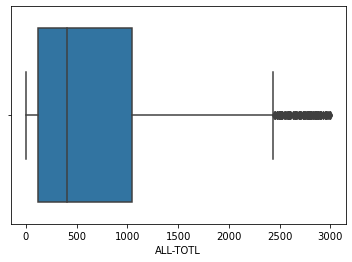

In [154]:
sns.boxplot(ac)

Text(0, 0.5, 'Frequency')

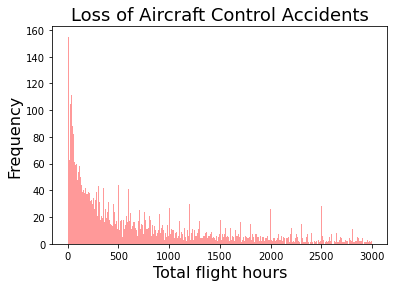

In [157]:
sns.distplot(ac, kde=False, color='red', bins=300)
plt.title('Loss of Aircraft Control Accidents', fontsize=18)
plt.xlabel('Total flight hours', fontsize=16)
plt.ylabel('Frequency', fontsize=16)